Capstone - Part 3

Topic: Data Pre-Processing & Clustering

Created By: Jason

In [1]:
#Mounting our Drive to Google Colab
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
# Import necessary libraries

import pandas as pd # data analysis
import numpy as np # arrays

import matplotlib.pyplot as plt # for visualisation
import seaborn as sns # for visualisation

In [4]:
# load dataset
path = '/drive/MyDrive/Colab Notebooks/CLEAN_2_Tour Agencies_v2.csv'
data = pd.read_csv(path)

In [5]:
# Remove irrelavant columns 
# First 2 variables will not be useful for further analysis

data = data.drop(['I have read and understood the above information. I understand that, because my answers will be fully anonymized, it will not be possible to withdraw them from the study once I have completed the survey. I agree to take part in this questionnaire survey a', 
                  'Are you currently residing in Malaysia?'], axis=1)

In [6]:
data.columns 

Index(['gender', 'age', 'household_income', 'marital_status', 'chidlren_no',
       'education_level', 'occupation', 'trip_plan_likelihood',
       'travel_purpose', 'source_travel_info', 'pref_socialmed_info',
       'pref_transport_mode', 'pref_length_stay', 'travel_pay_willingness',
       'pref_poi', 'pref_group_size', 'pref_travel_destination'],
      dtype='object')

In [7]:
data.shape

(115, 17)

Section 1: Data Pre-Processing

Age Variable

In [8]:
# Age 
# Issues: Imbalance as majority of the observations are under the 18-25 group
# Solution: Combine '26-34', '35-49', '50 and above' into a new '26 and above' group
data['age'].describe()
data['age'].value_counts()

18 - 25 years old    88
26 - 34 years old    23
35 - 49 years old     3
50 and above          1
Name: age, dtype: int64

In [9]:
# combine the other 2 variables
data['age'] = data['age'].replace({'35 - 49 years old': '26 - 34 years old'})
data['age'] = data['age'].replace({'50 and above': '26 - 34 years old'})
data['age'].value_counts()

18 - 25 years old    88
26 - 34 years old    27
Name: age, dtype: int64

In [10]:
# rename the category level to a much more appropriate name
data['age'] = data['age'].replace({'26 - 34 years old': '26 years and above'})
data['age'].value_counts()

18 - 25 years old     88
26 years and above    27
Name: age, dtype: int64

Montlhy House Variable

In [11]:
# Monthly Household Income
data['household_income'].value_counts()

Less than RM 4,850             57
Between RM 4,851 - RM10,959    40
More than 10,959               18
Name: household_income, dtype: int64

In [12]:
# As this dataset has not much observations, it is crucial to reduce the factor levels to improve model performance
# Option 1 -> combine More than 10,959 with Between RM 4,851 - RM 10,959
# Rename the new categorical level as 'More than 4,851'
data['household_income'] = data['household_income'].replace({'Between RM 4,851 - RM10,959': 'More than RM 4,851'})
data['household_income'] = data['household_income'].replace({'More than 10,959': 'More than RM 4,851'})
data['household_income'].value_counts()

More than RM 4,851    58
Less than RM 4,850    57
Name: household_income, dtype: int64

Marital Status Variable

In [13]:
#drop variables - data for this variable is hugely imbalance
data = data.drop(['marital_status'], axis = 1) 
# axis=0 refers to deletion of rows and axis=1 refers to deletion of columns

Number of Children Variable

In [14]:
#drop variables - data for this variable is hugely imbalance
data = data.drop(['chidlren_no'], axis = 1) 

Education Variable

In [15]:
# Education Level
# combine the other 2 categories (High School & Foundation / Diploma into one)
data['education_level'].value_counts()

Undergraduate / Bachelor's Degree    79
Master's Degree                      25
High School                           7
Foundation / Diploma                  4
Name: education_level, dtype: int64

In [16]:
data['education_level'] = data['education_level'].replace({'High School': 'Foundation / Diploma / High School'})
data['education_level'] = data['education_level'].replace({'Foundation / Diploma': 'Foundation / Diploma / High School'})
data['education_level'].value_counts()

Undergraduate / Bachelor's Degree     79
Master's Degree                       25
Foundation / Diploma / High School    11
Name: education_level, dtype: int64

Occupation Variable

In [17]:
# Occupation
# combine the other 1 category (Self-Employed) into (Employed) 
data['occupation'].value_counts()

Student          69
Employed         45
Self-Employed     1
Name: occupation, dtype: int64

In [18]:
# combine the other 1 category (Self-Employed) into (Employed) 
data['occupation'] = data['occupation'].replace({'Self-Employed': 'Employed'})
data['occupation'].value_counts()

Student     69
Employed    46
Name: occupation, dtype: int64

Trip Plan Likelihood Variable

In [19]:
# trip_plan_likelihood
# can be removed as this variable is just to help us visualise the
# likelihood of travellers planning to travel in the next 12 months
#drop variables 
data = data.drop(['trip_plan_likelihood'], axis = 1)

Travel Purpose Variable

In [20]:
# travel_purpose
# combine the other 1 category (Self-Employed) into (Employed) 
data['travel_purpose'].value_counts()

Holiday & Leisure          79
Family Trip                23
Entertainment               9
Shopping                    2
Corporate team building     1
Fly car                     1
Name: travel_purpose, dtype: int64

In [21]:
# Issue: Imbalance data on a few categorical factor levels
# combine 'Family trip', 'entertainment', 'shopping', 'corporate team building' and 'fly car' into one category level
# new category level name -> 'Family Trip / Entertainment / Others'
data['travel_purpose'] = data['travel_purpose'].replace({'Family Trip': 'Family Trip / Entertainment / Others'})
data['travel_purpose'] = data['travel_purpose'].replace({'Entertainment': 'Family Trip / Entertainment / Others'})
data['travel_purpose'] = data['travel_purpose'].replace({'Shopping': 'Family Trip / Entertainment / Others'})
data['travel_purpose'] = data['travel_purpose'].replace({'Corporate team building': 'Family Trip / Entertainment / Others'})
data['travel_purpose'] = data['travel_purpose'].replace({'Fly car': 'Family Trip / Entertainment / Others'})
data['travel_purpose'].value_counts()

Holiday & Leisure                       79
Family Trip / Entertainment / Others    36
Name: travel_purpose, dtype: int64

Source Travel Info Variable

In [22]:
# source_travel_info
# can be removed as this variable is just to help us visualise the
# source of travellers collecting travel related information and not directly related to group package
#drop variables 
data = data.drop(['source_travel_info'], axis = 1) 

Preferred Social Medial Info Variable

In [23]:
# Option 1 - Remove as this variable does not directly related to group package
data = data.drop(['pref_socialmed_info'], axis = 1) 

Preferred Mode of Transport Variable

In [24]:
#pref_transport_mode 
data['pref_transport_mode'].value_counts()

Flight    78
Bus       23
Train     14
Name: pref_transport_mode, dtype: int64

In [25]:
# Combine 'Bus' and 'Train' and form a new level to be referred as 'Non-Flight'
data['pref_transport_mode'] = data['pref_transport_mode'].replace({'Bus': 'Non_Flight'})
data['pref_transport_mode'] = data['pref_transport_mode'].replace({'Train': 'Non_Flight'})
data['pref_transport_mode'].value_counts()

Flight        78
Non_Flight    37
Name: pref_transport_mode, dtype: int64

Preferred Length of Stay Variable

In [26]:
# pref_length_stay 
data['pref_length_stay'].value_counts()

3 Days              47
Less than 3 days    25
5 Days              22
4 Days              21
Name: pref_length_stay, dtype: int64

In [27]:
# Combine '5 days' and '4 days' together and form a new level to be renamed as '4 days and above'
data['pref_length_stay'] = data['pref_length_stay'].replace({'5 Days': '4 days and above'})
data['pref_length_stay'] = data['pref_length_stay'].replace({'4 Days': '4 days and above'})
data['pref_length_stay'].value_counts()

3 Days              47
4 days and above    43
Less than 3 days    25
Name: pref_length_stay, dtype: int64

Willingness to Pay Variable

In [28]:
# travel_pay_willingness
data['travel_pay_willingness'].value_counts()

Between RM 200 – 300    61
More than RM 300        42
Less than RM 200        12
Name: travel_pay_willingness, dtype: int64

In [29]:
# Issue: 'Less than RM 200' has not much observations
# Solution no. 1 ->  Combine the level with the 'Between Rm 200 - 300'
# Rename the new level as 'Less than RM 300'
data['travel_pay_willingness'] = data['travel_pay_willingness'].replace({'Between RM 200 – 300': 'Less than RM 300'})
data['travel_pay_willingness'] = data['travel_pay_willingness'].replace({'Less than RM 200': 'Less than RM 300'})
data['travel_pay_willingness'].value_counts()

Less than RM 300    73
More than RM 300    42
Name: travel_pay_willingness, dtype: int64

Preferred POI Variable

In [30]:
# pref_poi
data['pref_poi'].value_counts()

Beaches and waterfall                                          46
Adventure and Activity (Ex: Hiking, Mountain Climbing etc.)    39
Cultural or Historical Site                                    24
Shopping Malls                                                  6
Name: pref_poi, dtype: int64

In [31]:
# Imbalance in 'shopping malls' level - May cause issues in training the ML model
# Combine 'shopping malls' and 'Cultural or historical site' to form a new categorical level
data['pref_poi'] = data['pref_poi'].replace({'Cultural or Historical Site': 'Shopping Malls & Historical Site'})
data['pref_poi'] = data['pref_poi'].replace({'Shopping Malls': 'Shopping Malls & Historical Site'})
data['pref_poi'].value_counts()

Beaches and waterfall                                          46
Adventure and Activity (Ex: Hiking, Mountain Climbing etc.)    39
Shopping Malls & Historical Site                               30
Name: pref_poi, dtype: int64

Preferred Travel Group Size Variable

In [32]:
# pref_group_size
data['pref_group_size'].value_counts()

Family Travel (3 – 6 people)         82
Small Group (6 – 10 people)          32
Large Group (More than 10 people)     1
Name: pref_group_size, dtype: int64

In [33]:
# combine 'Large Group' with 'Small Group' as it only has 1 observation
# rename the new categorical variable after combination
data['pref_group_size'] = data['pref_group_size'].replace({'Large Group (More than 10 people)': 'Small & Large Group (6 people and above)'})
data['pref_group_size'] = data['pref_group_size'].replace({'Small Group (6 – 10 people)': 'Small & Large Group (6 people and above)'})
data['pref_group_size'].value_counts()

Family Travel (3 – 6 people)                82
Small & Large Group (6 people and above)    33
Name: pref_group_size, dtype: int64

Section 2: Clustering (phase 1)

In [34]:
# Import libraries 
# Clustering
import pandas as pd
import numpy as np
# !pip install kmodes
!pip install kmodes
from kmodes.kmodes import KModes

import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 565.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 565.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 565.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 565.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 565.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 18, cost: 496.0
Run 1, iteration: 2/100, moves: 6, cost: 496.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 17, cost: 492.0
Run 2, iteration: 2/100, moves: 6, cost:

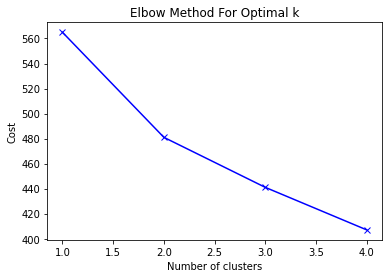

In [35]:
# KMODES CLUSTERING ALGORITHM
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for no_of_clusters in list(K):
    kmode = KModes(n_clusters=no_of_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters') 
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show() # to show us how the algorithm came into this conclusion that "3" is the optimal k

In [36]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
data_clusters = kmode.fit_predict(data)
data_clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 35, cost: 438.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 23, cost: 457.0
Run 2, iteration: 2/100, moves: 5, cost: 457.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 16, cost: 458.0
Run 3, iteration: 2/100, moves: 18, cost: 453.0
Run 3, iteration: 3/100, moves: 0, cost: 453.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 15, cost: 458.0
Run 4, iteration: 2/100, moves: 2, cost: 458.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 22, cost: 446.0
Run 5, iteration: 2/100, moves: 6, cost: 446.0
Best run was number 1


array([0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0,
       1, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0,
       2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2,
       0, 2, 2, 2, 2], dtype=uint16)

In [37]:
data.insert(0, "Cluster", data_clusters, True)
data

,Cluster,gender,age,household_income,education_level,occupation,travel_purpose,pref_transport_mode,pref_length_stay,travel_pay_willingness,pref_poi,pref_group_size,pref_travel_destination
0,0,Female,18 - 25 years old,"More than RM 4,851",Master's Degree,Student,Family Trip / Entertainment / Others,Flight,Less than 3 days,Less than RM 300,Shopping Malls & Historical Site,Family Travel (3 – 6 people),East Malaysia (Sabah and Sarawak)
1,0,Male,18 - 25 years old,"More than RM 4,851",Undergraduate / Bachelor's Degree,Employed,Holiday & Leisure,Flight,3 Days,Less than RM 300,Shopping Malls & Historical Site,Family Travel (3 – 6 people),"Southern Region (Malacca, Johor and Negeri Sem..."
2,0,Female,18 - 25 years old,"Less than RM 4,850",Undergraduate / Bachelor's Degree,Employed,Holiday & Leisure,Flight,3 Days,More than RM 300,Beaches and waterfall,Small & Large Group (6 people and above),"East Coast Region (Kelantan, Terengganu and Pa..."
3,0,Male,18 - 25 years old,"Less than RM 4,850",Master's Degree,Employed,Holiday & Leisure,Non_Flight,Less than 3 days,Less than RM 300,Beaches and waterfall,Family Travel (3 – 6 people),"East Coast Region (Kelantan, Terengganu and Pa..."
4,2,Female,18 - 25 years old,"Less than RM 4,850",Master's Degree,Employed,Holiday & Leisure,Flight,3 Days,More than RM 300,"Adventure and Activity (Ex: Hiking, Mountain C...",Family Travel (3 – 6 people),"East Coast Region (Kelantan, Terengganu and Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0,Male,18 - 25 years old,"More than RM 4,851",Undergraduate / Bachelor's Degree,Employed,Holiday & Leisure,Flight,4 days and above,Less than RM 300,Shopping Malls & Historical Site,Small & Large Group (6 people and above),"Northern Region (Perlis, Kedah, Penang and Perak)"
111,2,Female,18 - 25 years old,"More than RM 4,851",Undergraduate / Bachelor's Degree,Student,Holiday & Leisure,Non_Flight,4 days and above,Less than RM 300,"Adventure and Activity (Ex: Hiking, Mountain C...",Family Travel (3 – 6 people),"Southern Region (Malacca, Johor and Negeri Sem..."
112,2,Female,26 years and above,"Less than RM 4,850",Undergraduate / Bachelor's Degree,Student,Family Trip / Entertainment / Others,Flight,4 days and above,More than RM 300,"Adventure and Activity (Ex: Hiking, Mountain C...",Small & Large Group (6 people and above),Central Region (Kuala Lumpur and Selangor)
113,2,Female,18 - 25 years old,"Less than RM 4,850",Undergraduate / Bachelor's Degree,Employed,Holiday & Leisure,Flight,Less than 3 days,Less than RM 300,Beaches and waterfall,Family Travel (3 – 6 people),East Malaysia (Sabah and Sarawak)


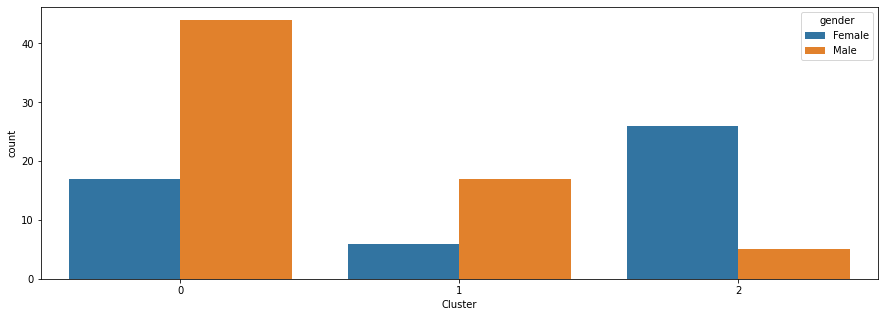

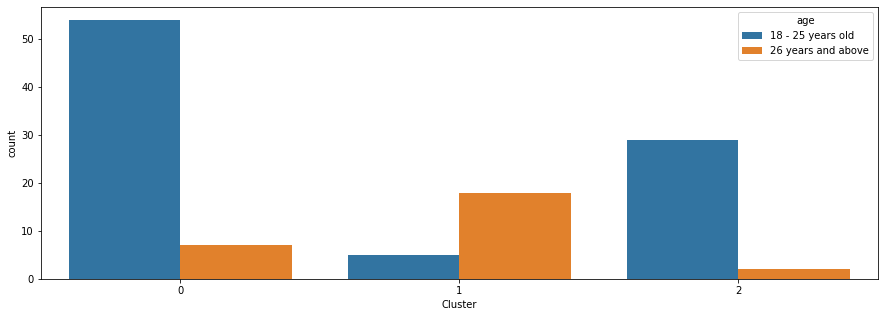

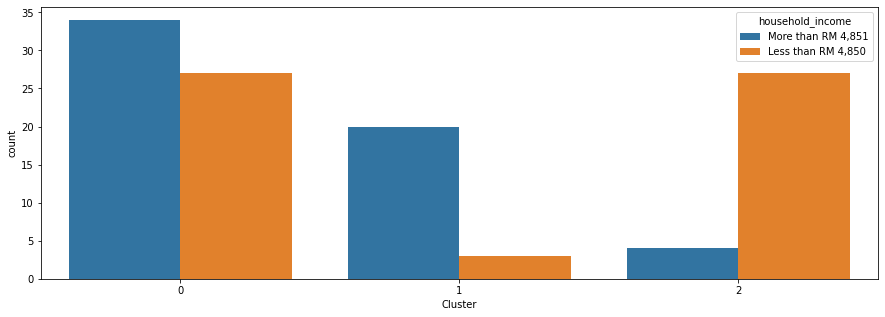

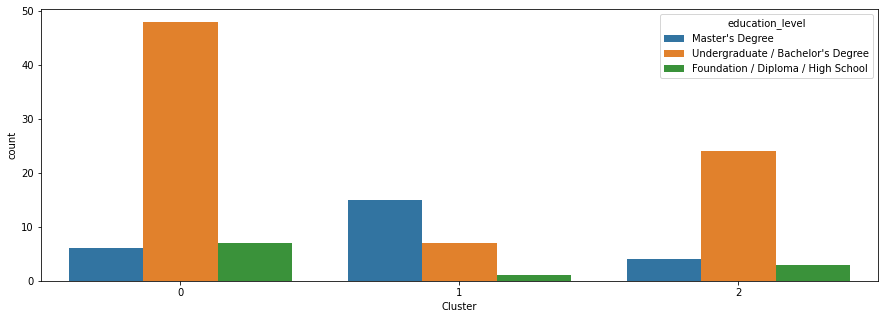

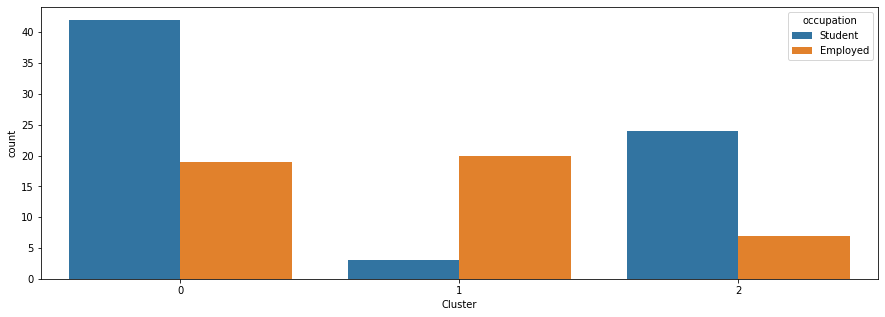

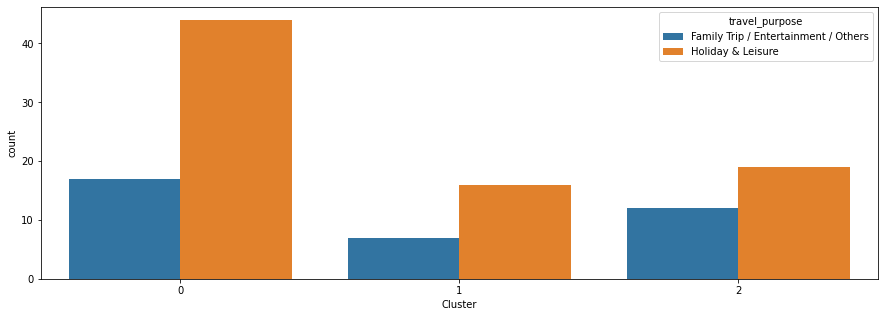

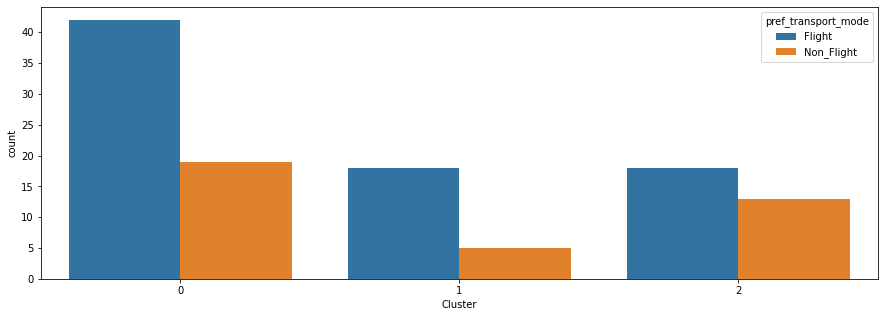

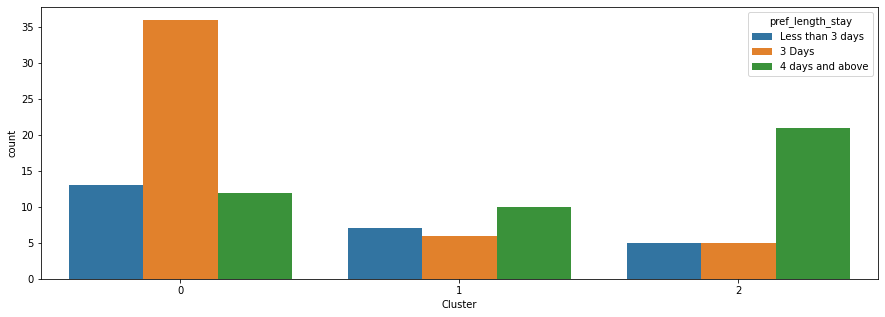

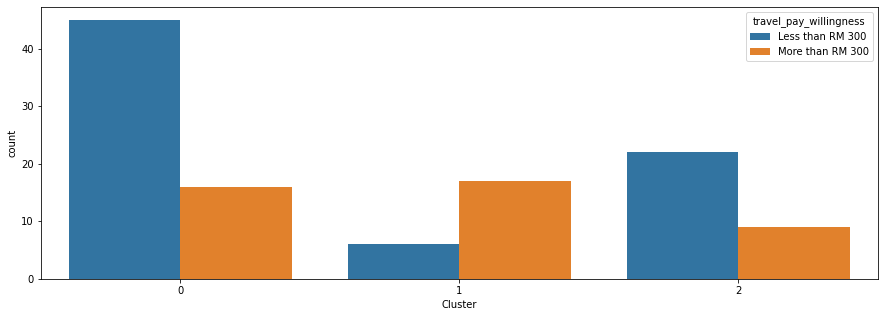

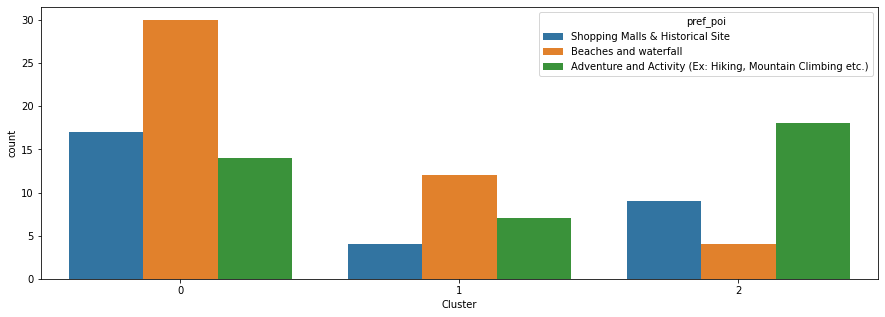

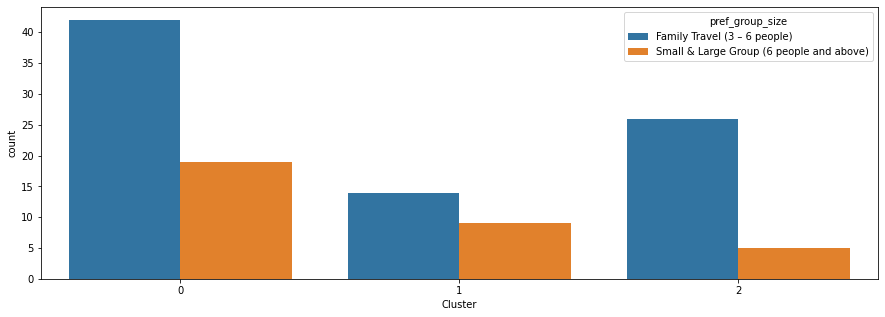

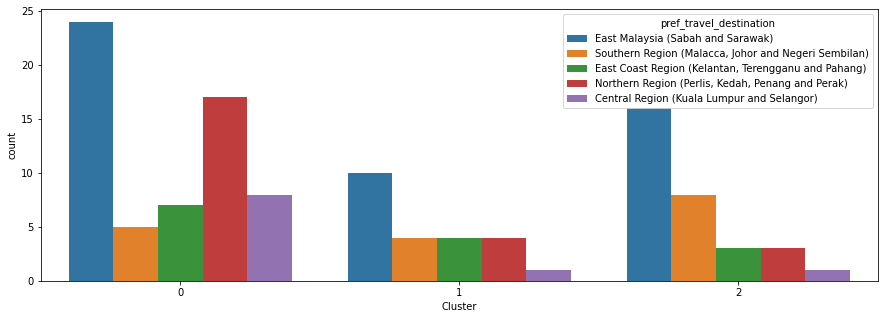

In [38]:
import seaborn as sns
all_features = ['gender', 'age', 'household_income',
       'education_level', 'occupation', 'travel_purpose',
       'pref_transport_mode', 'pref_length_stay', 'travel_pay_willingness',
       'pref_poi', 'pref_group_size', 'pref_travel_destination']
for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = data)
    plt.show()

In [39]:
# the variable 'cluster' type is classified as 'numeric' - hence, changes needed to change
# creating a dictionary 
# with column name and data type
data_types_dict = {'Cluster': str}
  
# we will change the data type 
# of id column to str by giving
# the dict to the astype method
data = data.astype(data_types_dict)
  
# checking the data types
# using df.dtypes method
data.dtypes

Cluster                    object
gender                     object
age                        object
household_income           object
education_level            object
occupation                 object
travel_purpose             object
pref_transport_mode        object
pref_length_stay           object
travel_pay_willingness     object
pref_poi                   object
pref_group_size            object
pref_travel_destination    object
dtype: object

In [ ]:
# Export the dataset to csv - backup copy 
import pandas as pd
import openpyxl as xls

data.to_csv("data_tour_cluster.csv")